In [1]:
import seaborn as sns

In [2]:
import pandas as pd

In [5]:
percent_ppl_below_proverty_level = pd.read_csv('Data/PercentagePeopleBelowPovertyLevel.csv', encoding='latin-1')

In [6]:
percent_ppl_below_proverty_level.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [7]:
percent_ppl_below_proverty_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
Geographic Area    29329 non-null object
City               29329 non-null object
poverty_rate       29329 non-null object
dtypes: object(3)
memory usage: 687.5+ KB


In [10]:
median_household_income = pd.read_csv('Data/MedianHouseholdIncome2015.csv', encoding="latin-1")

In [11]:
median_household_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29322 entries, 0 to 29321
Data columns (total 3 columns):
Geographic Area    29322 non-null object
City               29322 non-null object
Median Income      29271 non-null object
dtypes: object(3)
memory usage: 687.4+ KB


In [14]:
percent_over25_compl_hs = pd.read_csv('Data/PercentOver25CompletedHighSchool.csv', encoding="latin-1")

In [15]:
percent_over25_compl_hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
Geographic Area         29329 non-null object
City                    29329 non-null object
percent_completed_hs    29329 non-null object
dtypes: object(3)
memory usage: 687.5+ KB


In [18]:
police_killing = pd.read_csv('Data/PoliceKillingsUS.csv', encoding="latin-1")

In [19]:
police_killing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
id                         2535 non-null int64
name                       2535 non-null object
date                       2535 non-null object
manner_of_death            2535 non-null object
armed                      2526 non-null object
age                        2458 non-null float64
gender                     2535 non-null object
race                       2340 non-null object
city                       2535 non-null object
state                      2535 non-null object
signs_of_mental_illness    2535 non-null bool
threat_level               2535 non-null object
flee                       2470 non-null object
body_camera                2535 non-null bool
dtypes: bool(2), float64(1), int64(1), object(10)
memory usage: 242.7+ KB


In [21]:
race_by_city = pd.read_csv('Data/ShareRaceByCity.csv', encoding="latin-1")

In [22]:
race_by_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
Geographic area          29268 non-null object
City                     29268 non-null object
share_white              29268 non-null object
share_black              29268 non-null object
share_native_american    29268 non-null object
share_asian              29268 non-null object
share_hispanic           29268 non-null object
dtypes: object(7)
memory usage: 1.6+ MB


In [31]:
percent_ppl_below_proverty_level[percent_ppl_below_proverty_level['poverty_rate'].str.contains('-')].count()

Geographic Area    201
City               201
poverty_rate       201
dtype: int64

In [33]:
percent_ppl_below_proverty_level['poverty_rate'].replace(['-'],0.0, inplace=True)

In [38]:
percent_ppl_below_proverty_level['poverty_rate'] = percent_ppl_below_proverty_level['poverty_rate'].astype(float)

In [39]:
percent_ppl_below_proverty_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
Geographic Area    29329 non-null object
City               29329 non-null object
poverty_rate       29329 non-null float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


In [40]:
percent_ppl_below_proverty_level.sample(10)

,Geographic Area,City,poverty_rate
6578,IL,Hanover Park village,11.9
18440,NC,Maiden town,18.1
21429,OR,Sandy city,10.7
19064,ND,Osnabrock city,14.5
29152,WY,Boulder CDP,0.0
16793,NM,Tecolotito CDP,92.7
661,AK,Diomede city,65.1
28407,WI,Berlin city,18.7
4733,FL,Page Park CDP,46.6
21959,PA,Effort CDP,4.1


### Proverty Rate of each state

In [43]:
area_list = list(percent_ppl_below_proverty_level['Geographic Area'].unique())

In [46]:
gb = percent_ppl_below_proverty_level.groupby('Geographic Area')

In [49]:
data = gb.agg('mean')

In [51]:
data.head()

,poverty_rate
Geographic Area,
AK,18.678592
AL,20.611795
AR,22.963216
AZ,25.268071
CA,16.888371


In [60]:
res = data.sort_values(by='poverty_rate',ascending=False)

In [67]:
res = res.reset_index()

In [71]:
res.head()

,Geographic Area,poverty_rate,col
0,MS,26.884254,4
1,AZ,25.268071,4
2,GA,23.663636,4
3,AR,22.963216,4
4,NM,22.507675,4


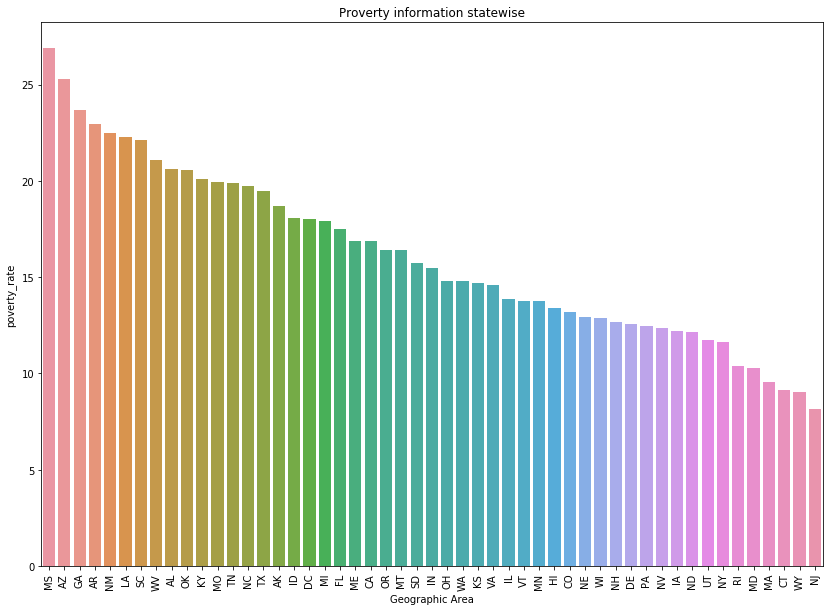

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(14,10))

plt.xticks(rotation=90)
plt.xlabel('States')
plt.title('Proverty information statewise')
sns.barplot(x=res['Geographic Area'], y=res['poverty_rate'])

In [77]:
race_by_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


* Showing distribution across each row

In [78]:
race_by_city.replace(['-'],0.0, inplace=True)

In [83]:
race_by_city.replace(['(X)'],0.0, inplace=True)

In [84]:
subset = race_by_city.filter(regex='share')

In [87]:
subset = subset.astype(float)

In [89]:
subset['Geographic area'] = race_by_city['Geographic area']

In [90]:
subset['City'] = race_by_city['City']

In [91]:
subset.sample(10)

,share_white,share_black,share_native_american,share_asian,share_hispanic,Geographic area,City
20048,89.1,7.3,0.1,1.0,1.7,OH,Reading city
6044,98.4,0.5,0.0,0.0,0.5,ID,Weston city
6215,96.0,2.9,0.0,0.0,0.0,IL,Bush village
7730,97.1,1.2,0.1,0.1,1.5,IN,Lake Santee CDP
11730,29.2,62.2,0.6,0.2,8.1,MI,Benton Heights CDP
11404,70.1,16.5,0.2,4.9,10.8,MD,West Laurel CDP
23281,60.6,18.1,0.5,1.2,25.4,SC,Berea CDP
20204,92.0,3.1,0.4,1.0,1.8,OH,The Plains CDP
16744,79.9,0.4,3.3,0.8,61.7,NM,Sausal CDP
2858,75.7,2.0,8.2,0.7,22.4,CA,Needles city


In [92]:
data = subset

In [95]:
data = data.groupby('Geographic area').agg('mean')

In [97]:
data = data.reset_index()

In [113]:
data.head()

,Geographic area,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AK,45.264225,0.562535,45.477183,1.376620,2.130986
1,AL,72.507266,23.322318,0.659343,0.479758,2.980104
2,AR,78.449538,16.296858,0.759889,0.477079,4.273013
3,AZ,59.929047,0.954545,28.589800,0.726608,20.144568
4,CA,71.535982,2.679645,1.715167,5.542613,29.513592


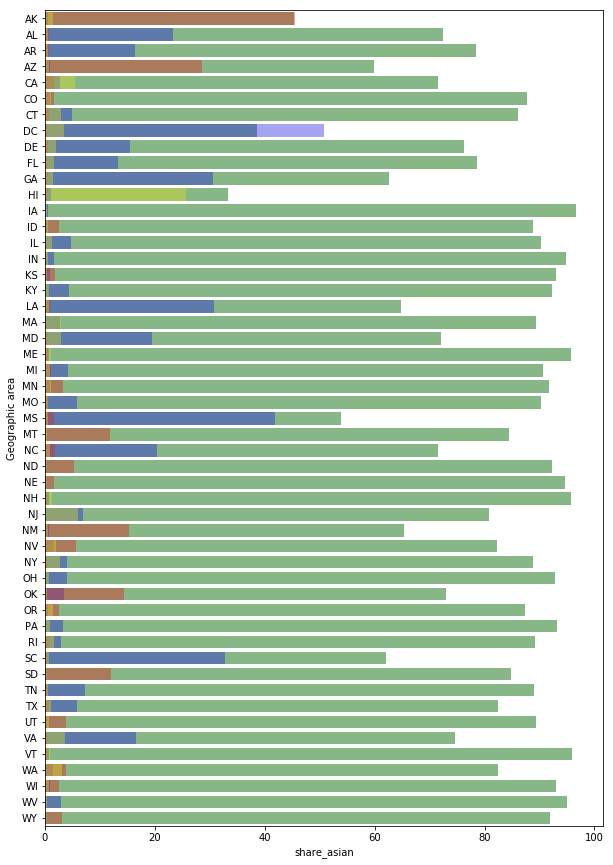

In [114]:
#It's currenlty starting from zero, need to start after previous data
f,ax = plt.subplots(figsize=(10,15))
plt.xlabel('Percentage')
sns.barplot(x=data.share_white, y=data['Geographic area'],color='green',alpha=.5, label='White')
sns.barplot(x=data.share_black, y=data['Geographic area'],color='blue',alpha=.4, label='AFAm')
sns.barplot(x=data.share_native_american, y=data['Geographic area'],color='red',alpha=.4, label='Native Am')
sns.barplot(x=data.share_asian, y=data['Geographic area'],color='yellow',alpha=.4, label='Native Am')


In [115]:
# High School Graduation Rate vs Proverty of each state

In [118]:
percent_over25_compl_hs.percent_completed_hs.replace(['-'],0.0, inplace=True)

In [119]:
percent_over25_compl_hs.percent_completed_hs = percent_over25_compl_hs.percent_completed_hs.astype(float)

In [120]:
percent_over25_compl_hs.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [122]:
data2 = percent_over25_compl_hs.groupby('Geographic Area').agg('mean')

In [124]:
data2 = data2.reset_index()

In [128]:
res.drop(columns=['col'],inplace=True)

In [132]:
result = pd.merge(left=data2, right=res)

In [135]:
result.head()

,Geographic Area,percent_completed_hs,poverty_rate
0,AK,80.098028,18.678592
1,AL,80.163419,20.611795
2,AR,79.949538,22.963216
3,AZ,79.218182,25.268071
4,CA,80.824639,16.888371


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text xticklabel objects>)

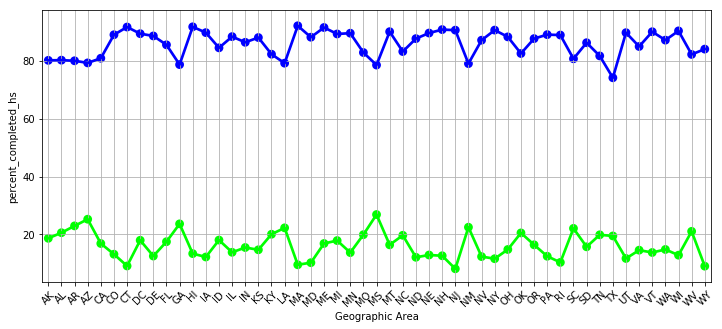

In [144]:
plt.subplots(figsize=(12,5))
sns.pointplot(x='Geographic Area',y='poverty_rate',data=result,color='lime')
sns.pointplot(x='Geographic Area',y='percent_completed_hs',data=result,color='blue')
plt.grid()
plt.xticks(rotation=45)

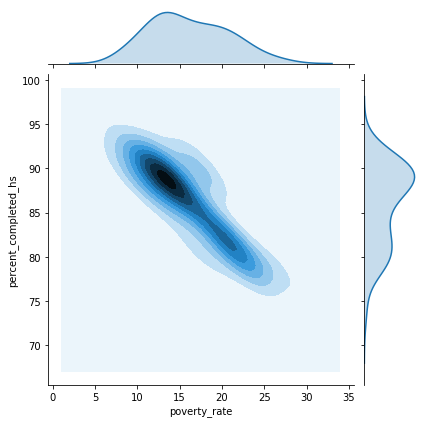

In [145]:
sns.jointplot(result.poverty_rate, result.percent_completed_hs, kind='kde')

In [146]:
result.corr()

,percent_completed_hs,poverty_rate
percent_completed_hs,1.000000,-0.805761
poverty_rate,-0.805761,1.000000


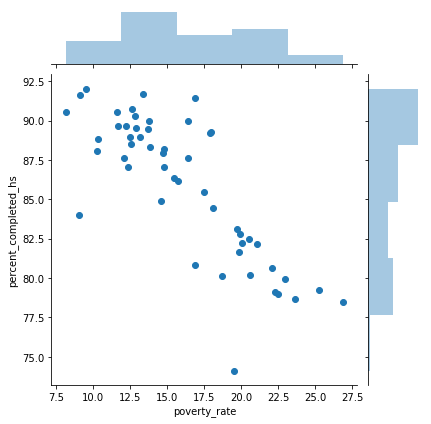

In [147]:
sns.jointplot(result.poverty_rate, result.percent_completed_hs)

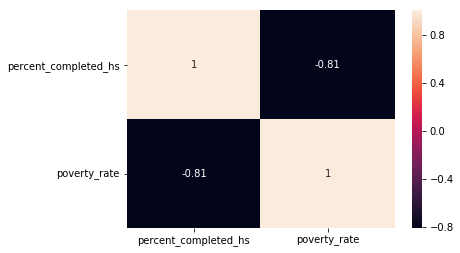

In [149]:
sns.heatmap(result.corr(), annot=True)

In [152]:
kill = police_killing[['gender','manner_of_death']]

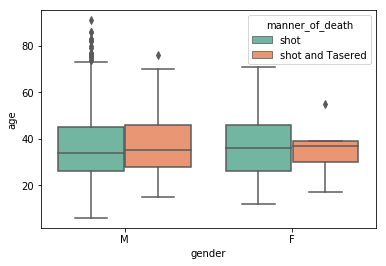

In [155]:
sns.boxplot(x='gender',y='age',hue='manner_of_death', data=police_killing, palette='Set2')

In [161]:
police_killing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
id                         2535 non-null int64
name                       2535 non-null object
date                       2535 non-null object
manner_of_death            2535 non-null object
armed                      2526 non-null object
age                        2458 non-null float64
gender                     2535 non-null object
race                       2340 non-null object
city                       2535 non-null object
state                      2535 non-null object
signs_of_mental_illness    2535 non-null bool
threat_level               2535 non-null object
flee                       2470 non-null object
body_camera                2535 non-null bool
dtypes: bool(2), float64(1), int64(1), object(10)
memory usage: 242.7+ KB


In [160]:
police_killing.select_dtypes(include=['int','float'])

,id,age
0,3,53.0
1,4,47.0
2,5,23.0
3,8,32.0
4,9,39.0
5,11,18.0
6,13,22.0
7,15,35.0
8,16,34.0
9,17,47.0


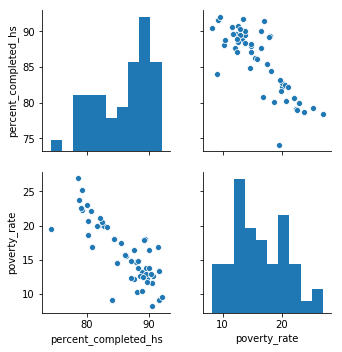

In [158]:
sns.pairplot(result)

In [163]:
kill.manner_of_death.value_counts()

shot                2363
shot and Tasered     172
Name: manner_of_death, dtype: int64

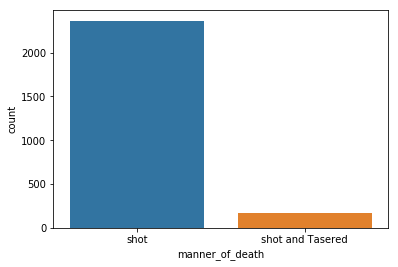

In [164]:
sns.countplot(kill.manner_of_death)

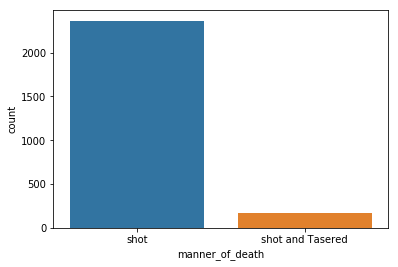

In [166]:
sns.countplot(kill.manner_of_death)